In [3]:
 #import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [4]:
import tensorflow as tf
print(tf.__version__)

2.1.0


In [5]:
IMAGE_SIZE=[224,224]
train_path='Dataset/Train'
valid_path='Dataset/Test'

In [6]:
vgg19=VGG19(input_shape=IMAGE_SIZE + [3] ,weights='imagenet' ,include_top=False)

80142336/80134624 [==============================] - 943s 12us/step


In [8]:
vgg19.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [9]:
for layer in vgg19.layers:
    layer.trainable=False


In [10]:
folders=glob('Dataset/Train/*')

In [11]:
folders

['Dataset/Train\\Parasite', 'Dataset/Train\\Uninfected']

In [12]:
x=Flatten()(vgg19.output)

In [24]:
prediction=Dense(len(folders),activation='softmax')(x)

model=Model(inputs=vgg19.input ,outputs=prediction)

In [25]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [26]:
from tensorflow.keras.layers import MaxPooling3D

In [27]:
'''
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()
'''

'\nmodel=Sequential()\nmodel.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))\nmodel.add(MaxPooling2D(pool_size=2))\nmodel.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))\nmodel.add(MaxPooling2D(pool_size=2))\nmodel.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))\nmodel.add(MaxPooling2D(pool_size=2))\nmodel.add(Flatten())\nmodel.add(Dense(500,activation="relu"))\nmodel.add(Dense(2,activation="softmax"))\nmodel.summary()\n'

In [28]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [29]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1./255,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True)

test_datagen=ImageDataGenerator(rescale=1./255)

In [34]:
training_set=train_datagen.flow_from_directory('Dataset/Train',
                                              target_size=(224,224),
                                              batch_size=32,
                                              class_mode='categorical')

Found 416 images belonging to 2 classes.


In [35]:
training_set

In [36]:
test_set=test_datagen.flow_from_directory('Dataset/Test',
                                         target_size=(224,224),
                                         batch_size=32,
                                         class_mode='categorical')

Found 134 images belonging to 2 classes.


In [40]:
history=model.fit(
    training_set,
    validation_data=test_set,
    epochs=10,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set))

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 13 steps, validate for 5 steps
Epoch 1/10
13/13 [==============================] - 40s 3s/step - loss: 0.3438 - accuracy: 0.8558 - val_loss: 0.3624 - val_accuracy: 0.7463
Epoch 2/10
13/13 [==============================] - 40s 3s/step - loss: 0.3228 - accuracy: 0.8774 - val_loss: 0.4233 - val_accuracy: 0.7612
Epoch 3/10
13/13 [==============================] - 40s 3s/step - loss: 0.2862 - accuracy: 0.8894 - val_loss: 0.3599 - val_accuracy: 0.8284
Epoch 4/10
13/13 [==============================] - 40s 3s/step - loss: 0.2823 - accuracy: 0.8870 - val_loss: 0.3357 - val_accuracy: 0.7463
Epoch 5/10
13/13 [==============================] - 40s 3s/step - loss: 0.2470 - accuracy: 0.8966 - val_loss: 0.3617 - val_accuracy: 0.8358
Epoch 6/10
13/13 [==============================] - 40s 3s/step - loss: 0.2368 - accuracy: 0.9183 - val_loss: 0.3017 - val_accuracy: 0.7612
Epoch 7/10
13/13 [==============================] - 40s 3s/step - los

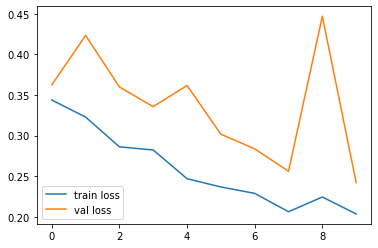

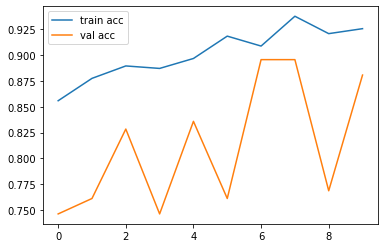

<Figure size 432x288 with 0 Axes>

In [41]:
# plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [42]:
from tensorflow.keras.models import load_model
model.save('model_vgg19.h5')

In [43]:
y_pred=model.predict(test_set)

In [44]:
y_pred

array([[9.97882426e-01, 2.11749598e-03],
       [4.56312269e-01, 5.43687701e-01],
       [2.46730089e-01, 7.53269911e-01],
       [4.39418823e-01, 5.60581207e-01],
       [7.23139524e-01, 2.76860505e-01],
       [9.95114088e-01, 4.88585513e-03],
       [9.71120656e-01, 2.88793836e-02],
       [7.15131283e-01, 2.84868687e-01],
       [9.96432066e-01, 3.56786489e-03],
       [8.99968386e-01, 1.00031607e-01],
       [2.89247960e-01, 7.10752010e-01],
       [5.77022851e-01, 4.22977209e-01],
       [3.76909137e-01, 6.23090863e-01],
       [4.11772281e-01, 5.88227689e-01],
       [8.52408528e-01, 1.47591442e-01],
       [9.98990834e-01, 1.00911327e-03],
       [9.96117353e-01, 3.88260605e-03],
       [6.28409684e-01, 3.71590316e-01],
       [9.99955893e-01, 4.40835865e-05],
       [5.04320621e-01, 4.95679408e-01],
       [3.40624660e-01, 6.59375310e-01],
       [2.96046793e-01, 7.03953207e-01],
       [9.48496997e-01, 5.15030511e-02],
       [4.28915441e-01, 5.71084559e-01],
       [9.995248

In [46]:
import numpy as np
y_pred=np.argmax(y_pred,axis=1)

In [47]:
y_pred

array([0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0], dtype=int64)

In [49]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [50]:
model=load_model('model_vgg19.h5')

In [51]:
img=image.load_img('Dataset/Test/Uninfected/2.png',target_size=(224,224))

In [52]:
x=image.img_to_array(img)

In [53]:
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [54]:
x.shape

(224, 224, 3)

In [55]:
x=x/255

In [57]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [58]:
model.predict(img_data)

array([[0.00942249, 0.9905776 ]], dtype=float32)

In [59]:
a=np.argmax(model.predict(img_data),axis=1)

In [60]:
if(a==1):
    print("Uninfected")
else:
    print("Infected")

Uninfected
